<a href="https://colab.research.google.com/github/peterjsadowski/sklearn_examples/blob/master/sklearn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/training_data.csv


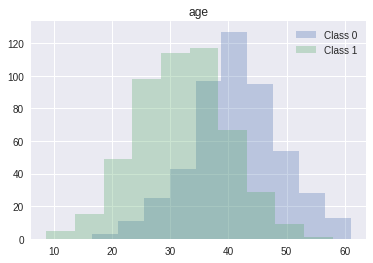

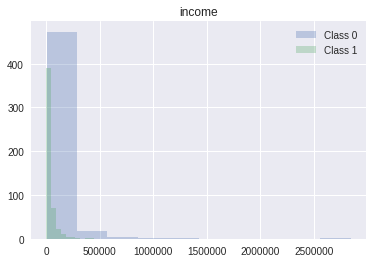

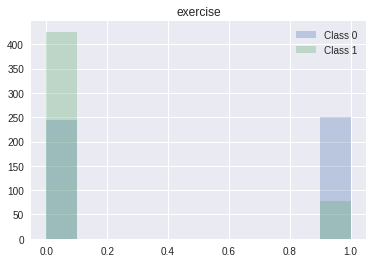

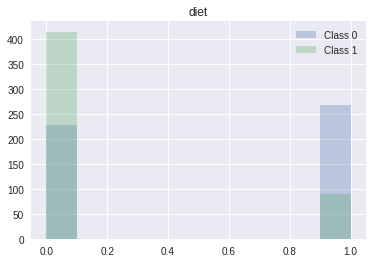

In [3]:
# This notebook provides an example of how to use sklearn classifiers.
# Loads data from train_data.csv.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
# For more details see https://scikit-learn.org/stable/modules/linear_model.html

# Load data.
data_url = 'https://raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/training_data.csv'
localfile = np.DataSource(destpath='./').open(data_url).name
print(localfile)
data = np.loadtxt(localfile, skiprows=1, delimiter=',')
Y = data[:, 0] 
X = data[:, 1:]

# Plot features. 
feature_names = ['age', 'income', 'exercise', 'diet']
for i in range(X.shape[1]):
    plt.figure(i)
    plt.hist(X[Y==0, i], label='Class 0', alpha=0.3)
    plt.hist(X[Y==1, i], label='Class 1', alpha=0.3)
    plt.title(feature_names[i])
    plt.legend()

In [16]:
### Classifier 

# Preprocess data.
X[:, 0] /= 100. 
X[:, 1] /= 100000.

# Divide data into train and validation set.
N_train, N_valid = 900, 100
X_train, X_valid = X[0:N_train, :], X[N_train:, :]
y_train, y_valid = Y[0:N_train], Y[N_train:]

# Define a classifier model. (Lots of options to choose from.)
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
#clf = linear_model.RidgeClassifier(alpha=0.1)
#clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Fit/train/learn.
clf.fit(X_train, y_train)

# Compute accuracy on training data.
accuracy_train = clf.score(X_train, y_train)
print(f'Training accuracy: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted = clf.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy: {accuracy_valid:0.2}')
print('Validation predictions: ', y_predicted)

print('Coefficients: ', clf.coef_, clf.intercept_)

Training accuracy: 0.74
Validation accuracy: 0.73
Validation predictions:  [0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0.]
Coefficients:  [[-3.87765884e-05 -2.74293276e-10 -1.00042198e+00 -1.01486631e+00]] [1.]


In [19]:
### Example of Cross-Validation
from sklearn.model_selection import cross_val_score
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
cv_scores = cross_val_score(clf, X, Y, cv=5)
print('Cross-validation accuracies: ', cv_scores)
print('Mean CV accuracy: %0.2f' % np.mean(cv_scores))

Cross-validation accuracies:  [0.61691542 0.755      0.72       0.695      0.64321608]
Mean CV accuracy: 0.69
